# **TRAINANDVALID DATASET EDA**

In [172]:
# Imorting packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## **Task 1: EDA**

In [173]:
dataset_path = "/Users/carlsonoranu/Documents/vscode/EDA/TrainAndValid.csv"
df = pd.read_csv(dataset_path)

/var/folders/7v/g3ljy9ss23j81h_n13d80xtr0000gn/T/ipykernel_28416/4143312425.py:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


In [174]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
# Convert 'saledate' to a datetime data type
df['saledate'] = pd.to_datetime(df['saledate'])

# Extract the year and store it in a new column 'YearSold'
df['YearSold'] = df['saledate'].dt.year

# Display the updated DataFrame with the new 'YearSold' column
print(df[['saledate', 'YearSold']])

         saledate  YearSold
0      2006-11-16      2006
1      2004-03-26      2004
2      2004-02-26      2004
3      2011-05-19      2011
4      2009-07-23      2009
...           ...       ...
412693 2012-03-07      2012
412694 2012-01-28      2012
412695 2012-01-28      2012
412696 2012-03-07      2012
412697 2012-01-28      2012

[412698 rows x 2 columns]


In [176]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (412698, 54)


In [177]:
print("Basic statistics for numerical variables:")
print(df.describe())

Basic statistics for numerical variables:
            SalesID      SalePrice     MachineID        ModelID  \
count  4.126980e+05  412698.000000  4.126980e+05  412698.000000   
mean   2.011161e+06   31215.181414  1.230061e+06    6947.201828   
std    1.080068e+06   23141.743695  4.539533e+05    6280.824982   
min    1.139246e+06    4750.000000  0.000000e+00      28.000000   
25%    1.421898e+06   14500.000000  1.088593e+06    3261.000000   
50%    1.645852e+06   24000.000000  1.284397e+06    4605.000000   
75%    2.261012e+06   40000.000000  1.478079e+06    8899.000000   
max    6.333349e+06  142000.000000  2.486330e+06   37198.000000   

          datasource   auctioneerID       YearMade  MachineHoursCurrentMeter  \
count  412698.000000  392562.000000  412698.000000              1.475040e+05   
mean      135.169361       6.585268    1899.049637              3.522988e+03   
std         9.646749      17.158409     292.190243              2.716993e+04   
min       121.000000       0.00000

In [178]:
# Identify Missing Values
print("Missing values:")
print(df.isnull().sum())

Missing values:
SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blad

In [179]:
# Handle Missing Values by dropping columns with mixed data types
mixed_cols = []
for col in df.columns:
    if len(df[col].apply(type).value_counts()) > 1:
        mixed_cols.append(col)

# Drop the columns with mixed data types
df = df.drop(mixed_cols, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   saledate                  412698 non-null  datetime64[ns]
 9   fiModelDesc               412698 non-null  object        
 10  fiBaseModel               412698 non-null  object        
 11  fiProductClassDesc        412698 non-null  object        
 12  st

In [180]:
# Identify missing values in the remaining data frame
print(df.isnull().sum())

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
YearSold                         0
dtype: int64


In [181]:
print('Detected and Handled Outliers!')

z_scores = stats.zscore(df['YearMade'])
outliers = (z_scores > 3) | (z_scores < -3)

df = df[~outliers]

Detected and Handled Outliers!


## Presenting a New Data set for Analysis

In [182]:
print('Verifying that the outliers were taken out!')
print("Number of rows and columns:", df.shape)
df.head()

Verifying that the outliers were taken out!
Number of rows and columns: (373307, 16)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate,fiModelDesc,fiBaseModel,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,YearSold
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,2006-11-16,521D,521,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,2006
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,2004-03-26,950FII,950,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,2004
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,2004-02-26,226,226,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,2004
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,2011-05-19,PC120-6E,PC120,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,2011
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,2009-07-23,S175,S175,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,2009


## **Task 2: Data Analysis**

### Finding a relevant variable for analysis

In [183]:
# Initialize an empty dictionary to store the counts
unique_value_counts = {}

# Iterate through the columns
for column in df.columns:
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

# Print the counts
for column, count in unique_value_counts.items():
    print(f"Column '{column}' has {count} unique values.")


Column 'SalesID' has 373307 unique values.
Column 'SalePrice' has 933 unique values.
Column 'MachineID' has 318362 unique values.
Column 'ModelID' has 4835 unique values.
Column 'datasource' has 6 unique values.
Column 'auctioneerID' has 30 unique values.
Column 'YearMade' has 72 unique values.
Column 'MachineHoursCurrentMeter' has 14553 unique values.
Column 'saledate' has 3953 unique values.
Column 'fiModelDesc' has 4641 unique values.
Column 'fiBaseModel' has 1798 unique values.
Column 'fiProductClassDesc' has 72 unique values.
Column 'state' has 53 unique values.
Column 'ProductGroup' has 6 unique values.
Column 'ProductGroupDesc' has 6 unique values.
Column 'YearSold' has 24 unique values.


In [184]:
sale_price_stats = df['SalePrice'].describe()

# Display the summary statistics
print(sale_price_stats)

count    373307.000000
mean      32325.921197
std       23527.039336
min        4750.000000
25%       15000.000000
50%       25000.000000
75%       42000.000000
max      142000.000000
Name: SalePrice, dtype: float64


states with the most sales!


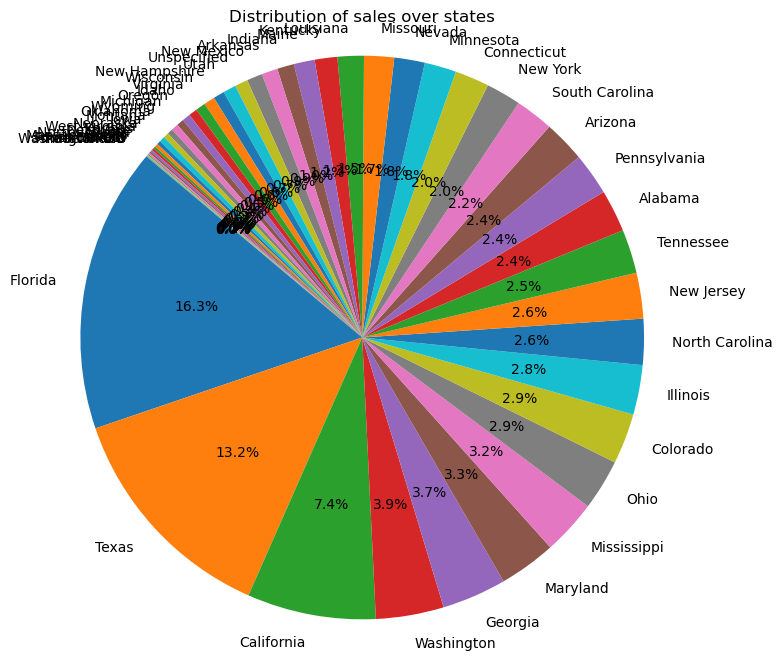

In [185]:
print('states with the most sales!')
# Count the frequency of each 'state'
state_counts = df['state'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of sales over states')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

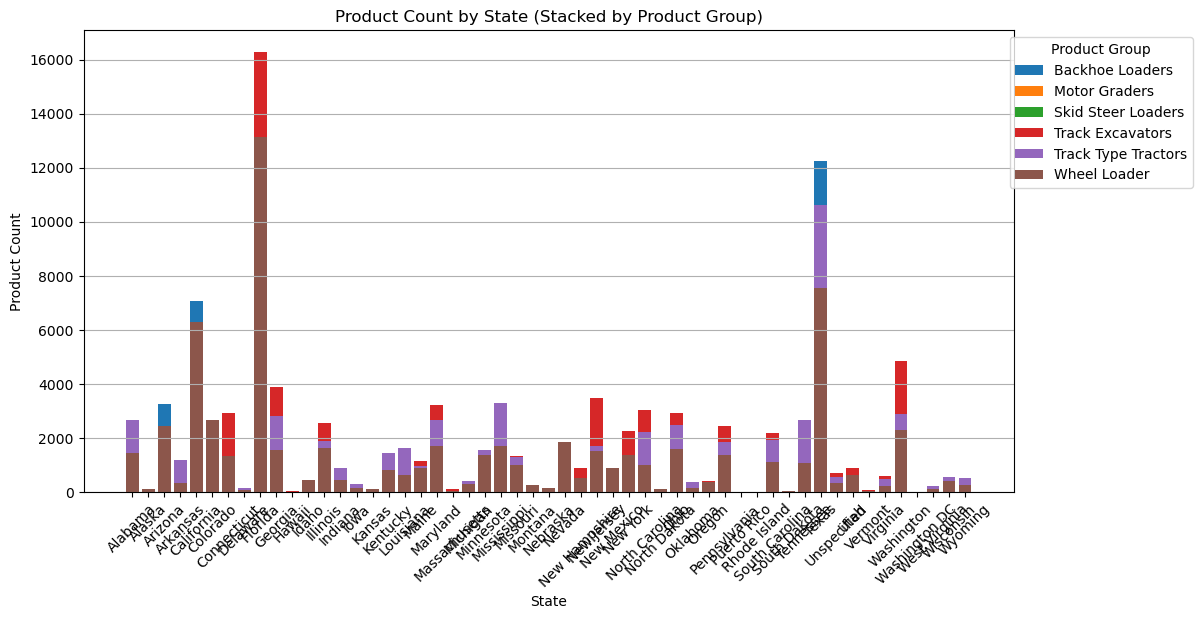

In [186]:
# Group the data by 'state' and 'ProductGroupDesc' and count the number of products for each combination
product_count_by_state_group = df.groupby(['state', 'ProductGroupDesc'])['MachineID'].count().reset_index()

# Pivot the table to make 'ProductGroupDesc' values as columns
pivot_table = product_count_by_state_group.pivot(index='state', columns='ProductGroupDesc', values='MachineID')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Plot each 'ProductGroupDesc' as a stacked bar
for group in pivot_table.columns:
    plt.bar(pivot_table.index, pivot_table[group], label=group)

plt.xlabel('State')
plt.ylabel('Product Count')
plt.title('Product Count by State')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Product Group', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


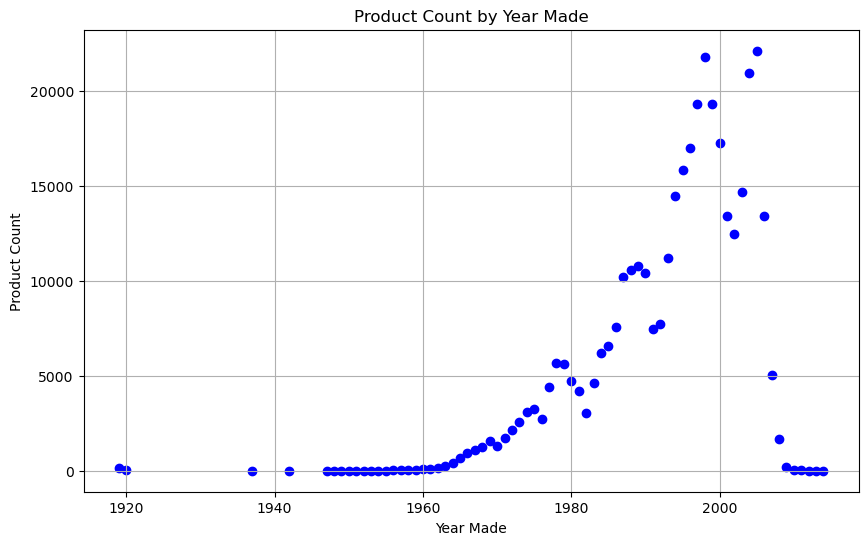

In [187]:
# Number of Machine sales over time
product_count_by_year = df['YearMade'].value_counts().reset_index()
product_count_by_year.columns = ['YearMade', 'ProductCount']

# Sort the data by 'MfgYear' in ascending order
product_count_by_year = product_count_by_year.sort_values('YearMade')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(product_count_by_year['YearMade'], product_count_by_year['ProductCount'], marker='o', color='b')
plt.xlabel('Year Made')
plt.ylabel('Product Count')
plt.title('Product Count by Year Made')
plt.grid(True)
plt.show()


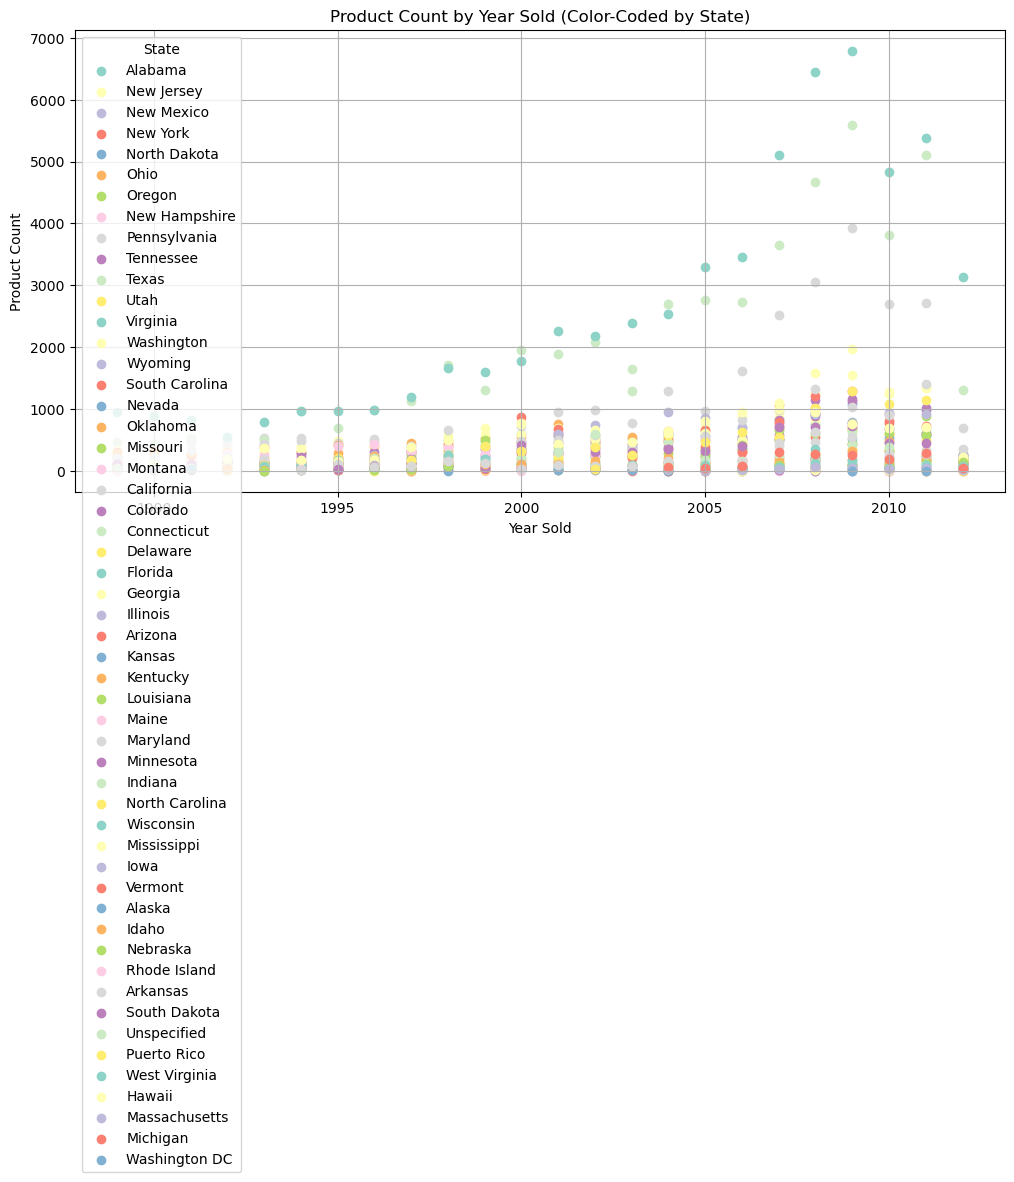

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Group the data by 'YearSold,' 'state,' and count the number of products in each year by each state
product_count_by_year_state = df.groupby(['YearSold', 'state']).size().reset_index(name='ProductCount')

# Sort the data by 'YearSold' in ascending order
product_count_by_year_state = product_count_by_year_state.sort_values('YearSold')

# Set a color palette for unique states
colors = sns.color_palette("Set3", n_colors=len(product_count_by_year_state['state'].unique()))

# Create a scatter plot with color-coded points
plt.figure(figsize=(12, 6))
for i, state in enumerate(product_count_by_year_state['state'].unique()):
    state_data = product_count_by_year_state[product_count_by_year_state['state'] == state]
    plt.scatter(
        state_data['YearSold'],
        state_data['ProductCount'],
        label=state,
        color=colors[i],
        marker='o',
    )

plt.xlabel('Year Sold')
plt.ylabel('Product Count')
plt.title('Product Count by Year Sold')
plt.legend(title='State', loc='upper left')
plt.grid(True)
plt.show()


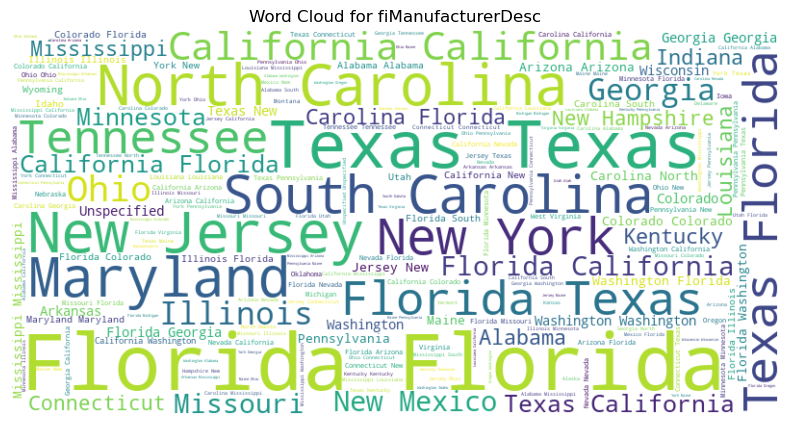

In [189]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Combine all 'state' values into a single text
text = " ".join(description for description in df['state'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for states')
plt.show()


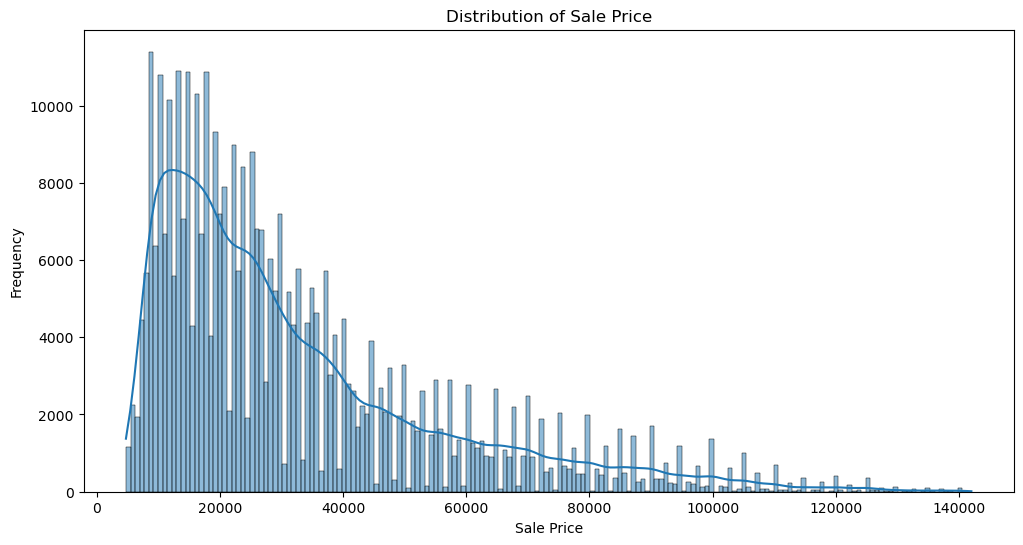

In [190]:
# Assuming 'df' is your DataFrame
import seaborn as sns

# Create a histogram to visualize the distribution of SalePrice
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()


Corelation Analysis


/var/folders/7v/g3ljy9ss23j81h_n13d80xtr0000gn/T/ipykernel_28416/1093705960.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


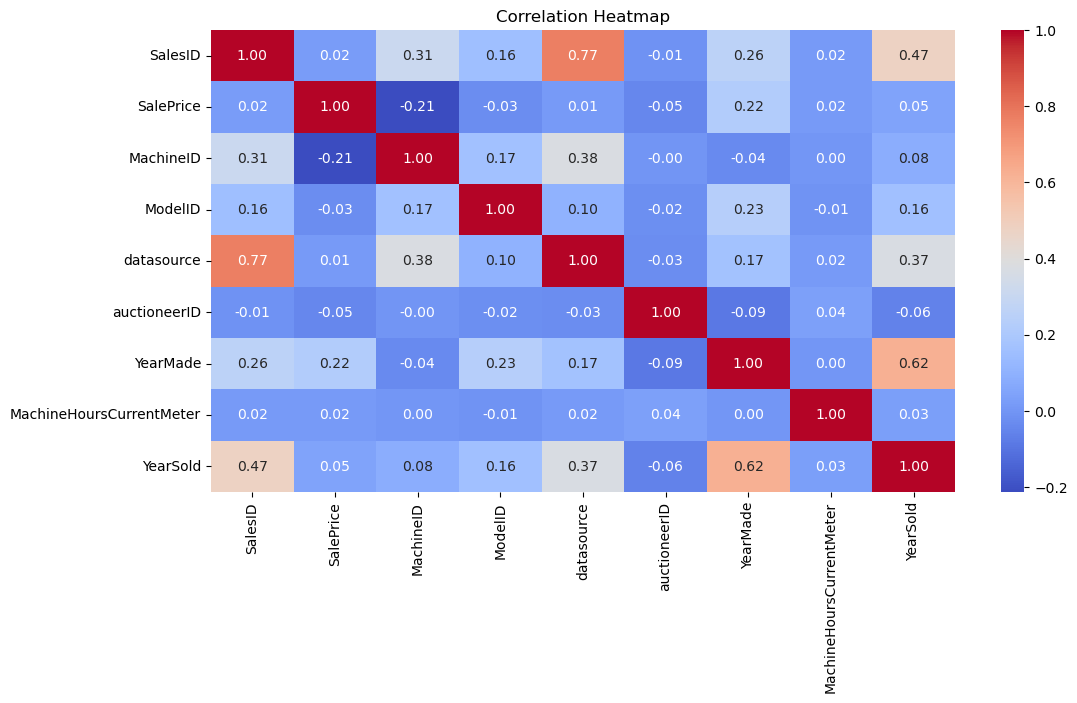

In [191]:
print("Corelation Analysis")
# Calculate Pearson's correlation coefficients for numerical variables
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


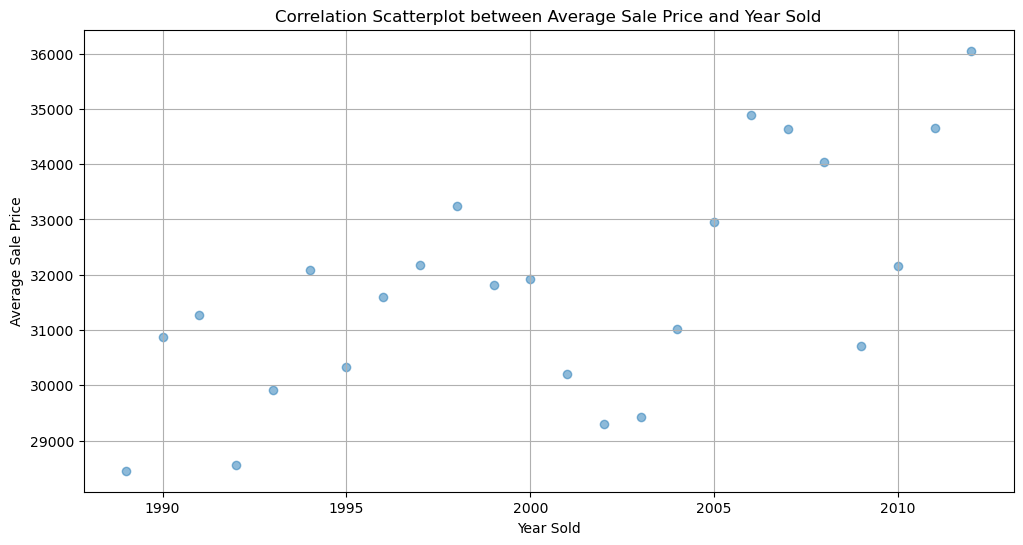

In [192]:
# Calculate the average 'SalePrice' per 'YearSold'
average_sale_price_by_year = df.groupby('YearSold')['SalePrice'].mean().reset_index()

# Create a scatterplot to visualize the correlation
plt.figure(figsize=(12, 6))
plt.scatter(average_sale_price_by_year['YearSold'], average_sale_price_by_year['SalePrice'], alpha=0.5)

plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.title('Correlation Scatterplot between Average Sale Price and Year Sold')
plt.grid(True)
plt.show()


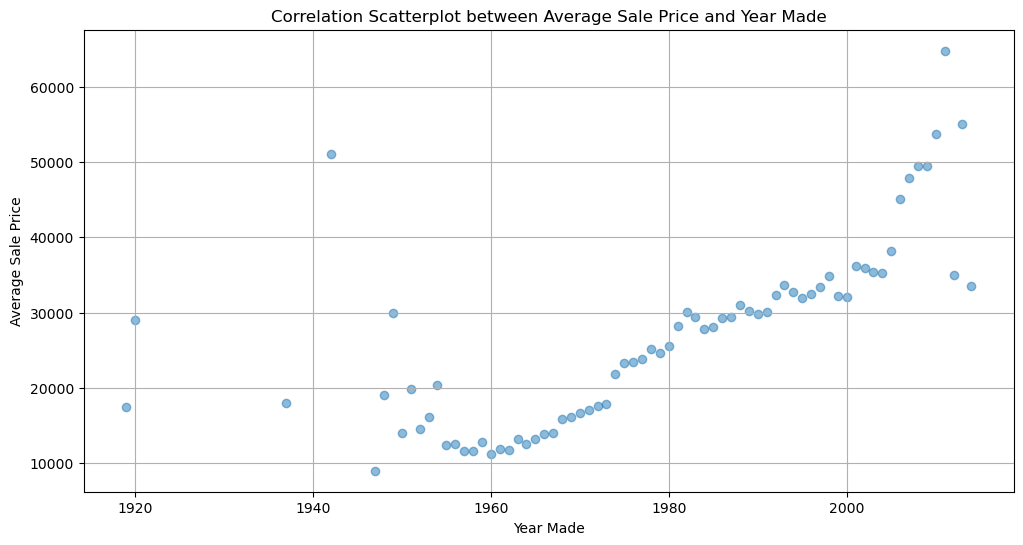

In [193]:


# Calculate the average 'SalePrice' per 'YearMade'
average_sale_price_by_year_made = df.groupby('YearMade')['SalePrice'].mean().reset_index()

# Create a scatterplot to visualize the correlation
plt.figure(figsize=(12, 6))
plt.scatter(average_sale_price_by_year_made['YearMade'], average_sale_price_by_year_made['SalePrice'], alpha=0.5)

plt.xlabel('Year Made')
plt.ylabel('Average Sale Price')
plt.title('Correlation Scatterplot between Average Sale Price and Year Made')
plt.grid(True)
plt.show()

## Task 3: Machine Learning Model

In [194]:
columns_with_missing_values = ['auctioneerID', 'MachineHoursCurrentMeter']

# Dropping rows with missing values in the specified columns
df.dropna(subset=columns_with_missing_values, inplace=True)

# Verify the updated DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112958 entries, 0 to 412642
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   112958 non-null  int64         
 1   SalePrice                 112958 non-null  float64       
 2   MachineID                 112958 non-null  int64         
 3   ModelID                   112958 non-null  int64         
 4   datasource                112958 non-null  int64         
 5   auctioneerID              112958 non-null  float64       
 6   YearMade                  112958 non-null  int64         
 7   MachineHoursCurrentMeter  112958 non-null  float64       
 8   saledate                  112958 non-null  datetime64[ns]
 9   fiModelDesc               112958 non-null  object        
 10  fiBaseModel               112958 non-null  object        
 11  fiProductClassDesc        112958 non-null  object        
 12  st

In [195]:
from sklearn.model_selection import train_test_split

# Define feature columns (exclude the target variable)
feature_columns = [
    'SalesID',
    'SalePrice',
    'MachineID',
    'ModelID',
    'datasource',
    'auctioneerID',
    'YearMade',
    'MachineHoursCurrentMeter',
    'YearMade'
]
# Define the target variable
target_variable = 'YearSold'

# Split the dataset into training and testing sets
X = df[feature_columns]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [197]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate MAE, RMSE, and R2
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}') 
print(f'R-squared (R2): {r2}')


Mean Absolute Error: 0.5920604638810167
Root Mean Squared Error: 0.9492846452153553
R-squared (R2): 0.8802925213838653
